In [5]:
import pandas as pd
import numpy as np
train = pd.read_csv('train (1).csv')
test = pd.read_csv('test.csv')
submisison = pd.read_csv("submission2.csv")

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [8]:
train.drop(["PoolQC","MiscFeature","Alley","Fence","MasVnrType","FireplaceQu"],axis=1,inplace=True)
test.drop(["PoolQC","MiscFeature","Alley","Fence","MasVnrType","FireplaceQu"],axis=1,inplace=True)

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


GarageYrBlt
GarageCond
GarageType
GarageFinish
GarageQual


In [10]:
train[["GarageYrBlt",
       "GarageCond",
       "GarageType",
       "GarageFinish",
       "GarageQual",
       ]].nunique()

GarageYrBlt     97
GarageCond       5
GarageType       6
GarageFinish     3
GarageQual       5
dtype: int64

In [11]:
train["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [12]:
#GarageQual
# 
#GarageCond
def encodeGarageQual(y):
    if y=="NA":
        return 0
    elif y=="Po":
        return 1
    elif y=="Fa":
        return 2
    elif y=="TA":
        return 3
    elif y=="Gd":
        return 4
    elif y=="Ex":
        return 5
    else:
        return -1
test["GarageQual"] = test["GarageQual"].apply(lambda y:  encodeGarageQual(y))
train["GarageQual"] = train["GarageQual"].apply(lambda y: encodeGarageQual(y))
test["GarageCond"] = test["GarageCond"].apply(lambda y: encodeGarageQual(y))
train["GarageCond"]=train["GarageCond"].apply(lambda y: encodeGarageQual(y))

Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	

In [13]:
#GarageFinish
def encodeGarageFinish(x):
    if x=="NA":
        return 0
    elif x=="Unf":
        return 1
    elif x=="RFn":
        return 2
    elif x=="Fin":
        return 3
    else:
        return -1
test["GarageFinish"] = test["GarageFinish"].apply(lambda x:  encodeGarageFinish(x))
train["GarageFinish"] =train["GarageFinish"].apply(lambda x: encodeGarageFinish(x))

In [14]:
#GarageYrBlt
train["GarageYrBlt"].bfill(axis='rows',inplace=True)
test["GarageYrBlt"].bfill(axis ='rows',inplace=True)

In [15]:
train[["GarageQual","GarageCond","GarageFinish"]].nunique()

GarageQual      6
GarageCond      6
GarageFinish    4
dtype: int64

In [16]:
train["GarageType"].bfill(axis='rows',inplace=True)
test["GarageType"].bfill(axis ='rows',inplace=True)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [17]:
#BsmtFinType2
def encodeBsmtFinType2(z):
    if z=="NA":
        return 0
    elif z=="Unf":
        return 1
    elif z=="LwQ":
        return 2
    elif z=="Rec":
        return 3
    elif z=="BLQ":
        return 4
    elif z=="ALQ":
        return 5
    elif z=="GLQ":
        return 6
    else:
        return -1
test["BsmtFinType2"] = test["BsmtFinType2"].apply(lambda z:  encodeBsmtFinType2(z))
train["BsmtFinType2"] =train["BsmtFinType2"].apply(lambda z: encodeBsmtFinType2(z))

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [18]:
#BsmtExposure
def encodeBsmtExposure(t):
    if t=="NA":
        return 0
    elif t=="No":
        return 0
    elif t=="Mn":
        return 1
    elif t=="Av":
        return 2
    elif t=="Gd":
        return 3
    else:
        return -1
test["BsmtExposure"] = test["BsmtExposure"].apply(lambda t:  encodeBsmtExposure(t))
train["BsmtExposure"] =train["BsmtExposure"].apply(lambda t: encodeBsmtExposure(t))

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [19]:
#BsmtQual
def encodeBsmtQual(m):
    if m=="NA":
        return 0
    elif m=="Po":
        return 1
    elif m=="Fa":
        return 2
    elif m=="TA":
        return 3
    elif m=="Gd":
        return 4
    else:
        return -1
test["BsmtQual"] = test["BsmtQual"].apply(lambda m:  encodeBsmtQual(m))
train["BsmtQual"] =train["BsmtQual"].apply(lambda m: encodeBsmtQual(m))

In [20]:
Quality_number=["ExterQual","BsmtQual","HeatingQC","KitchenQual"]

def encoding_2(y):
    if y=="Po":
        return 1
    elif y=="Fa":
        return 2
    elif y=="TA":
        return 3
    elif y=="Gd":
        return 4
    elif y=="Ex":
        return 5
    elif y=="NA":
        return 0
    else:
        return -1

for j in Quality_number:
    train[j] = train[j].apply(lambda y:  encoding_2(y))
    test[j]=test[j].apply(lambda y: encoding_2(y))


In [21]:
train[["BsmtQual","BsmtExposure","BsmtFinType2","GarageQual","GarageFinish","GarageCond"]].describe()

,BsmtQual,BsmtExposure,BsmtFinType2,GarageQual,GarageFinish,GarageCond
count,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,-1.0,0.630137,1.221233,2.754795,1.660274,2.753425
std,0.0,1.067391,0.941592,0.941837,1.019850,0.939293
min,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.0,0.000000,1.000000,3.000000,1.000000,3.000000
50%,-1.0,0.000000,1.000000,3.000000,2.000000,3.000000
75%,-1.0,1.000000,1.000000,3.000000,2.000000,3.000000
max,-1.0,3.000000,6.000000,5.000000,3.000000,5.000000


In [22]:
train.isnull().sum().sort_values(ascending=False)

LotFrontage     259
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 75, dtype: int64

In [23]:
train.loc[:, train.select_dtypes(include=['object',"category"]).columns] = train.select_dtypes(include=['object']).fillna('Bilinmiyor')
test.loc[:, test.select_dtypes(include=['object',"category"]).columns] = test.select_dtypes(include=['object']).fillna('Bilinmiyor')

In [24]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

(None, None)

In [25]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

object_cols = train.select_dtypes(include=['object']).columns

for col in object_cols:
  train[col] = encoder.fit_transform(train[[col]])
  test[col] = encoder.transform(test[[col]])

In [26]:
train.drop(columns=['Id','Utilities'],inplace=True)
test.drop(columns=['Id','Utilities'],inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   float64
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   LotConfig      1460 non-null   float64
 8   LandSlope      1460 non-null   float64
 9   Neighborhood   1460 non-null   float64
 10  Condition1     1460 non-null   float64
 11  Condition2     1460 non-null   float64
 12  BldgType       1460 non-null   float64
 13  HouseStyle     1460 non-null   float64
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   float64
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   float64
 5   LotShape       1459 non-null   float64
 6   LandContour    1459 non-null   float64
 7   LotConfig      1459 non-null   float64
 8   LandSlope      1459 non-null   float64
 9   Neighborhood   1459 non-null   float64
 10  Condition1     1459 non-null   float64
 11  Condition2     1459 non-null   float64
 12  BldgType       1459 non-null   float64
 13  HouseStyle     1459 non-null   float64
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyl

np.expm1()

In [29]:
#!pip install catboost
col="SalePrice"
X=train.drop(columns=[col])
y=train[col]
from sklearn.metrics import mean_squared_error

def rmse_log(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error between the logarithm of the predicted values
    and the logarithm of the observed values.

    Parameters:
    y_true (array-like): True values
    y_pred (array-like): Predicted values

    Returns:
    float: RMSE of the logarithm of the predictions and true values
    """
    # Applying logarithm to y_true and y_pred to ensure that errors in predicting
    # expensive and cheap houses affect the result equally
    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    return np.sqrt(mean_squared_error(log_true, log_pred))
from sklearn.preprocessing import StandardScaler,RobustScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold,KFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from xgboost import  XGBRegressor
import lightgbm 
# RMSE metric function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# CatBoost parameters
params = {
    'n_estimators': 195,
    'learning_rate': 0.07725732658711602,
    'depth': 7,
    'l2_leaf_reg': 8.601133541582584,
    'subsample': 0.4279526734063217,
    'colsample_bylevel': 0.6767696482697301,
    "random_state": 42
}

# Repeated K-Fold cross-validation
rkf = KFold(n_splits=5, shuffle=True,random_state=42)
scores = []
test_preds = np.zeros(len(test))
from sklearn.metrics import mean_squared_error

def rmse_log(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error between the logarithm of the predicted values
    and the logarithm of the observed values.

    Parameters:
    y_true (array-like): True values
    y_pred (array-like): Predicted values

    Returns:
    float: RMSE of the logarithm of the predictions and true values
    """
    # Applying logarithm to y_true and y_pred to ensure that errors in predicting
    # expensive and cheap houses affect the result equally
    #log_true = np.log1p(y_true)
    #log_pred = np.log1p(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))

for fold, (train_index, test_index) in enumerate(rkf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train=np.log1p(y_train)
    y_test=np.log1p(y_test)

    #LotArea
    #TotalBsmtSF
    #GrLivArea



    # Create and train CatBoost model
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train,verbose=False)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate RMSE score
    score = rmse_log(y_test, y_pred)
    scores.append(score)
    print(f"Fold {fold + 1}: RMSE = {score}")
    test_preds += model.predict(test) / rkf.n_splits
# Calculate average RMSE score
mean_score = np.mean(scores)
print("Average RMSE =", mean_score)

Fold 1: RMSE = 0.1471942324028906
Fold 2: RMSE = 0.1325022047800919
Fold 3: RMSE = 0.17318864406857595
Fold 4: RMSE = 0.14660550921988008
Fold 5: RMSE = 0.12206976897561315
Average RMSE = 0.14431207188941034


In [31]:
#!pip install catboost
col="SalePrice"
X=train.drop(columns=[col])
y=train[col]
from sklearn.metrics import mean_squared_error

def rmse_log(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error between the logarithm of the predicted values
    and the logarithm of the observed values.

    Parameters:
    y_true (array-like): True values
    y_pred (array-like): Predicted values

    Returns:
    float: RMSE of the logarithm of the predictions and true values
    """
    # Applying logarithm to y_true and y_pred to ensure that errors in predicting
    # expensive and cheap houses affect the result equally
    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    return np.sqrt(mean_squared_error(log_true, log_pred))
from sklearn.preprocessing import StandardScaler,RobustScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold,KFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
# RMSE metric function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# CatBoost parameters
params = {
    'n_estimators': 195,
    'learning_rate': 0.07725732658711602,
    'depth': 7,
    'l2_leaf_reg': 8.601133541582584,
    'subsample': 0.4279526734063217,
    'colsample_bylevel': 0.6767696482697301,
    "random_state": 42
}

# Repeated K-Fold cross-validation
rkf = KFold(n_splits=50, shuffle=True,random_state=42)
scores = []
test_preds = np.zeros(len(test))
from sklearn.metrics import mean_squared_error

def rmse_log(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error between the logarithm of the predicted values
    and the logarithm of the observed values.

    Parameters:
    y_true (array-like): True values
    y_pred (array-like): Predicted values

    Returns:
    float: RMSE of the logarithm of the predictions and true values
    """
    # Applying logarithm to y_true and y_pred to ensure that errors in predicting
    # expensive and cheap houses affect the result equally
    #log_true = np.log1p(y_true)
    #log_pred = np.log1p(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))

for fold, (train_index, test_index) in enumerate(rkf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train=np.log1p(y_train)
    y_test=np.log1p(y_test)
    
    #LotArea
    #TotalBsmtSF
    #GrLivArea



# Create and train CatBoost ;model
    model = LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate RMSE score
    score = rmse_log(y_test, y_pred)
    scores.append(score)
    print(f"Fold {fold + 1}: RMSE = {score}")
    test_preds += model.predict(test) / rkf.n_splits
# Calculate average RMSE score
mean_score = np.mean(scores)
print("Average RMSE =", mean_score)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3353
[LightGBM] [Info] Number of data points in the train set: 1430, number of used features: 68
[LightGBM] [Info] Start training from score 12.024964
Fold 1: RMSE = 0.09996750519112758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3351
[LightGBM] [Info] Number of data points in the train set: 1430, number of used features: 68
[LightGBM] [Info] Start training from score 12.024143
Fold 2: RMSE = 0.12550782559197332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3346
[LightGBM] [Info] Number of data points in the tra

In [32]:
#!pip install catboost
col="SalePrice"
X=train.drop(columns=[col])
y=train[col]
from sklearn.metrics import mean_squared_error

def rmse_log(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error between the logarithm of the predicted values
    and the logarithm of the observed values.

    Parameters:
    y_true (array-like): True values
    y_pred (array-like): Predicted values

    Returns:
    float: RMSE of the logarithm of the predictions and true values
    """
    # Applying logarithm to y_true and y_pred to ensure that errors in predicting
    # expensive and cheap houses affect the result equally
    log_true = np.log1p(y_true)
    log_pred = np.log1p(y_pred)
    return np.sqrt(mean_squared_error(log_true, log_pred))
from sklearn.preprocessing import StandardScaler,RobustScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold,KFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
# RMSE metric function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# CatBoost parameters
params = {
    'n_estimators': 195,
    'learning_rate': 0.07725732658711602,
    'depth': 7,
    'l2_leaf_reg': 8.601133541582584,
    'subsample': 0.4279526734063217,
    'colsample_bylevel': 0.6767696482697301,
    "random_state": 42
}

# Repeated K-Fold cross-validation
rkf = KFold(n_splits=5, shuffle=True,random_state=42)
scores = []
test_preds = np.zeros(len(test))
from sklearn.metrics import mean_squared_error

def rmse_log(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error between the logarithm of the predicted values
    and the logarithm of the observed values.

    Parameters:
    y_true (array-like): True values
    y_pred (array-like): Predicted values

    Returns:
    float: RMSE of the logarithm of the predictions and true values
    """
    # Applying logarithm to y_true and y_pred to ensure that errors in predicting
    # expensive and cheap houses affect the result equally
    #log_true = np.log1p(y_true)
    #log_pred = np.log1p(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))

for fold, (train_index, test_index) in enumerate(rkf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train=np.log1p(y_train)
    y_test=np.log1p(y_test)

    #LotArea
    #TotalBsmtSF
    #GrLivArea



    # Create and train CatBoost model
    model = CatBoostRegressor(random_state=42)
    model.fit(X_train, y_train,verbose=False)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate RMSE score
    score = rmse_log(y_test, y_pred)
    scores.append(score)
    print(f"Fold {fold + 1}: RMSE = {score}")
    test_preds += model.predict(test) / rkf.n_splits
# Calculate average RMSE score
mean_score = np.mean(scores)
print("Average RMSE =", mean_score)


Fold 1: RMSE = 0.1294403480526906
Fold 2: RMSE = 0.1114713415286687
Fold 3: RMSE = 0.1516165720614641
Fold 4: RMSE = 0.1260632615294116
Fold 5: RMSE = 0.10435274033631609
Average RMSE = 0.12458885270171023


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_importance(model, features, num, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

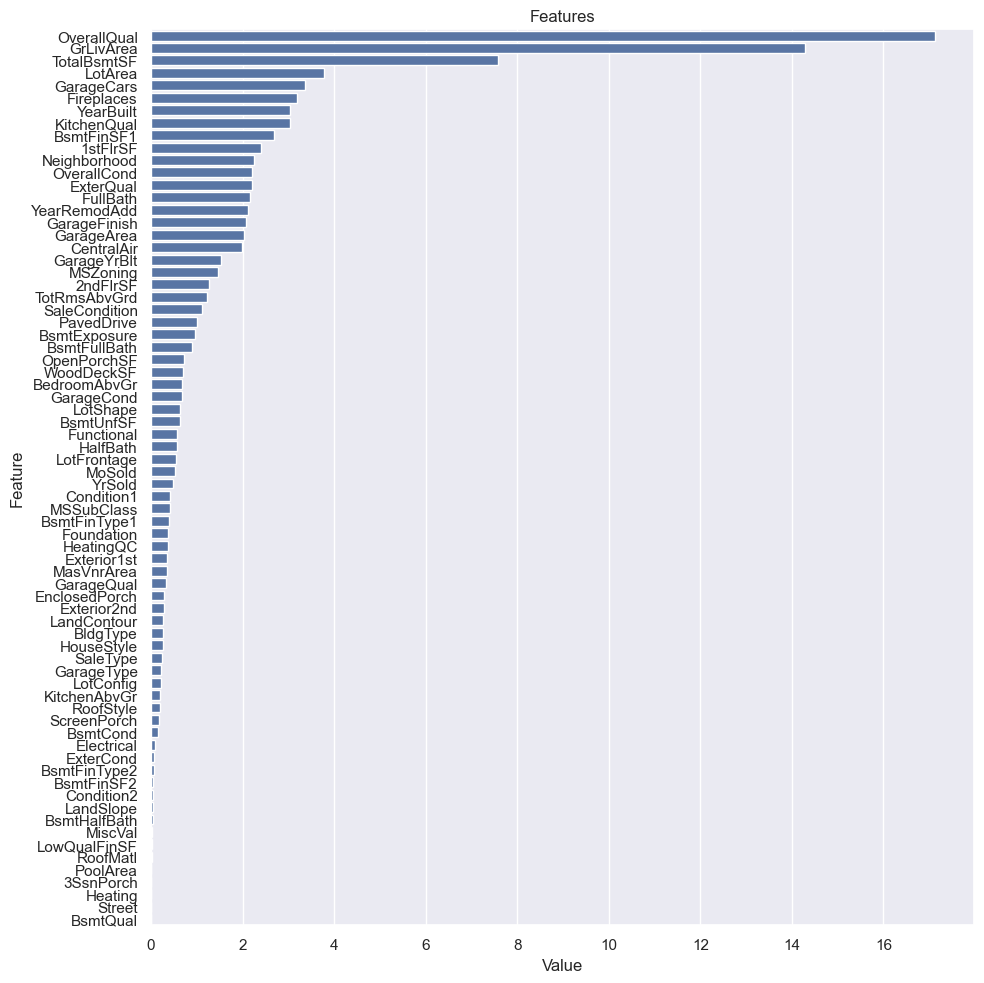

<Figure size 640x480 with 0 Axes>

In [34]:
plot_importance(model,features=X, num=X.shape[1], save=True)

In [35]:
model.feature_importances_

array([4.11711499e-01, 1.46173866e+00, 5.50694132e-01, 3.76883194e+00,
       2.13817882e-03, 6.41953513e-01, 2.60469581e-01, 2.10198394e-01,
       4.03237761e-02, 2.25222711e+00, 4.12872680e-01, 4.70707950e-02,
       2.54155224e-01, 2.53810731e-01, 1.71214503e+01, 2.21462002e+00,
       3.04694708e+00, 2.12410529e+00, 1.94185000e-01, 2.78491941e-02,
       3.52653419e-01, 2.78619056e-01, 3.52206995e-01, 2.21212174e+00,
       6.68775466e-02, 3.80602552e-01, 0.00000000e+00, 1.58398947e-01,
       9.66203064e-01, 3.95530873e-01, 2.68939095e+00, 5.46980781e-02,
       5.24505720e-02, 6.27182530e-01, 7.58042318e+00, 3.17993235e-03,
       3.71009096e-01, 1.98736407e+00, 9.59192573e-02, 2.39985079e+00,
       1.27061480e+00, 2.86794454e-02, 1.42932720e+01, 8.88770192e-01,
       3.63162212e-02, 2.16753042e+00, 5.57228119e-01, 6.77859265e-01,
       1.97410920e-01, 3.03616718e+00, 1.21732433e+00, 5.76798827e-01,
       3.19424056e+00, 2.20548269e-01, 1.53902083e+00, 2.08179859e+00,
      

In [36]:
test_preds=np.expm1(test_preds)
test_preds

array([123165.67334291, 162868.45988774, 182950.29394168, ...,
       158741.24617449, 113944.12443675, 218783.68379296])

In [37]:
submisison['SalePrice'] = test_preds
submisison.to_csv('submission2.csv',index=False)